Gabor ML - Problem 10

-Clarice Mottet

Outline:

Functions:
-Generate linearly separably data
-Generate non-linearly separably data
-Perceptron algorithm

Uses:
-test algorithm on different dimensions of data and types of data

In [3]:
#Libraries

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


path_out_ = r'/home/clarice/Documents/VSCode/Term2_Gabor_ML/homework3/GaborML_problem10/outputs'
random.seed(123)

In [68]:
#Functions

#Generate linearly separable data
def generate_ls_data(a, d, n):
    #a is a number in range [0,1]
    #d is dimension of sample data
    #n is number of sample points

    #x is a list of n numpy arrays
    #y is a list of n corresponding {-1,1}

    #determine y values with probability .5
    probability_y_equals_1 = .5
    y = [1 if random.random() > probability_y_equals_1 else -1 for _ in range(n)]
    x = []

    #creates list of x iid sample vectors based on problem conditions
    for i in range(n):
        x_i = np.zeros(d)
        for j in range(d):
            #first element based on a
            if j == 0:
                if y[i] == 1:
                    x_i[j] = random.uniform(-1,-a)
                else:
                    x_i[j] = random.uniform(a,1)
            #other elements based on [-1,1]
            else:
                x_i[j] = random.uniform(-1,1)
        x.append(x_i)        

    return x, y

def generate_nls_data(m, d, n):
    #create y data
    probability_y_equals_1 = .5
    y = [1 if random.random() >= probability_y_equals_1 else -1 for _ in range(n)]

    #create non-linearly separable data per problem description
    mean = np.zeros(d)
    mean[0] = m
    cov = np.identity(d)
    
    x_arr = np.random.multivariate_normal(mean, cov, n)
    x = [x_arr[i] for i in range(n)]

    return x, y

# def generate_nls_data(m, d, n):
#     #create y data
#     probability_y_equals_1 = .5
#     y = [1 if random.random() >= probability_y_equals_1 else -1 for _ in range(n)]

#     #create non-linearly separable data per problem description
#     mean = np.zeros(d)
#     mean[0] = m
#     cov = np.identity(d)
    
#     x_arr_zero = np.random.multivariate_normal(np.zeros(d), cov, n)
#     x_arr_mean = np.random.multivariate_normal(mean, cov, n)
#     x = [x_arr_zero[i] if y[i] == 1 else x_arr_mean[i] for i in range(n)]

#     return x, y


def perceptron_algorithm(x, y, learning_rate, max_epochs):
    #dimension requirements
    d = int(x[0].size)
    n = len(y)

    convergence_ind = 0
    steps_to_converge = max_epochs
    #random values between 0 and 1 (uniform)
    w = np.random.rand(d)
    b = 0.0

    #function vars
    update_log = np.zeros(max_epochs)
    num_epochs_taken = 0
    num_updates_per_epoch = 0

    while num_epochs_taken < max_epochs:
        for i in range(n):
            y_pred = np.sign(np.dot(w,x[i])+b)
            if y_pred != y[i]:
                w = np.add(w, learning_rate*(y[i]-y_pred)*x[i])
                b = b + learning_rate*(y[i]-y_pred)
                num_updates_per_epoch += 1
        #update vars for next epoch
        update_log[num_epochs_taken] = num_updates_per_epoch
        num_epochs_taken += 1
        num_updates_per_epoch = 0

        #check for convergence
        if update_log[num_epochs_taken-1] == 0:
            steps_to_converge = num_epochs_taken
            num_epochs_taken = max_epochs
            convergence_ind = 1

    return w, b, update_log, steps_to_converge, convergence_ind

def perceptron_algorithm_accuracy(x_test, y_test, w, b):
    n = len(y_test)
    error_count = 0
    for i in range(n):
        y_pred = np.sign(np.dot(w,x_test[i])+b)
        if y_test[i] != y_pred:
            error_count += 1

    error_rate = error_count/n

    return error_count, error_rate



In [19]:
#keep track of linearly separable data
# df_log_ls = pd.DataFrame()

In [40]:
# #Linearly separable case

# a_values = [.0001, .001, .01, .1, .2]
# d_values = [2, 100, 250, 500, 1000]
# n_values = [20, 100, 1000, 5000, 7500]

# learning_rate = .1
# max_epochs = 200

# num_of_simulations = 20

# #create a log of testing different values
# for iter_ in range(num_of_simulations):
#     print(iter_)
#     for a in a_values:
#         for d in d_values:
#             for n in n_values:
#                 x, y = generate_ls_data(a, d, n)
#                 w, b, update_log, steps_to_converge, convergence_ind = perceptron_algorithm(x, y, learning_rate, max_epochs)
#                 x_test, y_test = generate_ls_data(a, d, n)
#                 error_count, error_rate = perceptron_algorithm_accuracy(x_test, y_test, w, b)
#                 df_ = pd.DataFrame([[iter_, a, d, n, steps_to_converge, convergence_ind, error_rate]], columns = ['simulation_run','a_value','d_value','n_value','steps_to_converge','convergence_ind','error_rate'])
#                 df_log_ls = pd.concat([df_log_ls,df_], ignore_index = False)
#                 df_log_ls.reset_index(drop = True, inplace = True)
#                 df_log_ls.to_excel(path_out_+'//'+'df_log_linearly_separable.xlsx',index = False)


convergence indicator 1
steps to converge 3
error rate 0.0


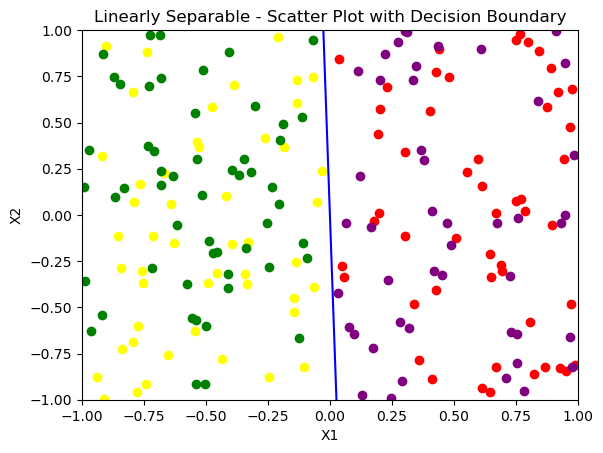

In [92]:
#Plot linearly separable example case

a = .01
d = 2
n = 100

x, y = generate_ls_data(a, d, n)
# print("x",x)
# print("y",y)

learning_rate = .1
max_epochs = 200

w, b, update_log, steps_to_converge, convergence_ind = perceptron_algorithm(x, y, learning_rate, max_epochs)
print("convergence indicator",convergence_ind)
print("steps to converge",steps_to_converge)
# print("w",w)
# print("b",b)
x_test, y_test = generate_ls_data(a, d, n)
error_count, error_rate = perceptron_algorithm_accuracy(x_test, y_test, w, b)

print("error rate", error_rate)

# Scatter plot
for xi, yi in zip(x, y):
    if yi == 1:
        plt.scatter(xi[0], xi[1], color='yellow')
    else:
        plt.scatter(xi[0], xi[1], color='red')
#test data
for xi, yi in zip(x_test, y_test):
    if yi == 1:
        plt.scatter(xi[0], xi[1], color='green')
    else:
        plt.scatter(xi[0], xi[1], color='purple')

# To plot the line, we need two points that satisfy the equation. Let's choose two x values:
x_values = np.array([-1,1])
# Calculate corresponding y values
y_values = (-b - w[0]*x_values) / w[1]

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.plot(x_values, y_values, color='blue')  # Plotting the line
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linearly Separable - Scatter Plot with Decision Boundary')
plt.show()


Above is a 2D example of 100 samples where the yellow dots represent the sample data points with Y=1, the red dots represent the sample data points with Y=-1, the green dots represent the test data points with Y=1 and the purple dots represent the test data points with Y=-1.

We see that both the training data and test data are linearly separable with a = .01 and that the algorithm was able to create a model that linearly separates the population.

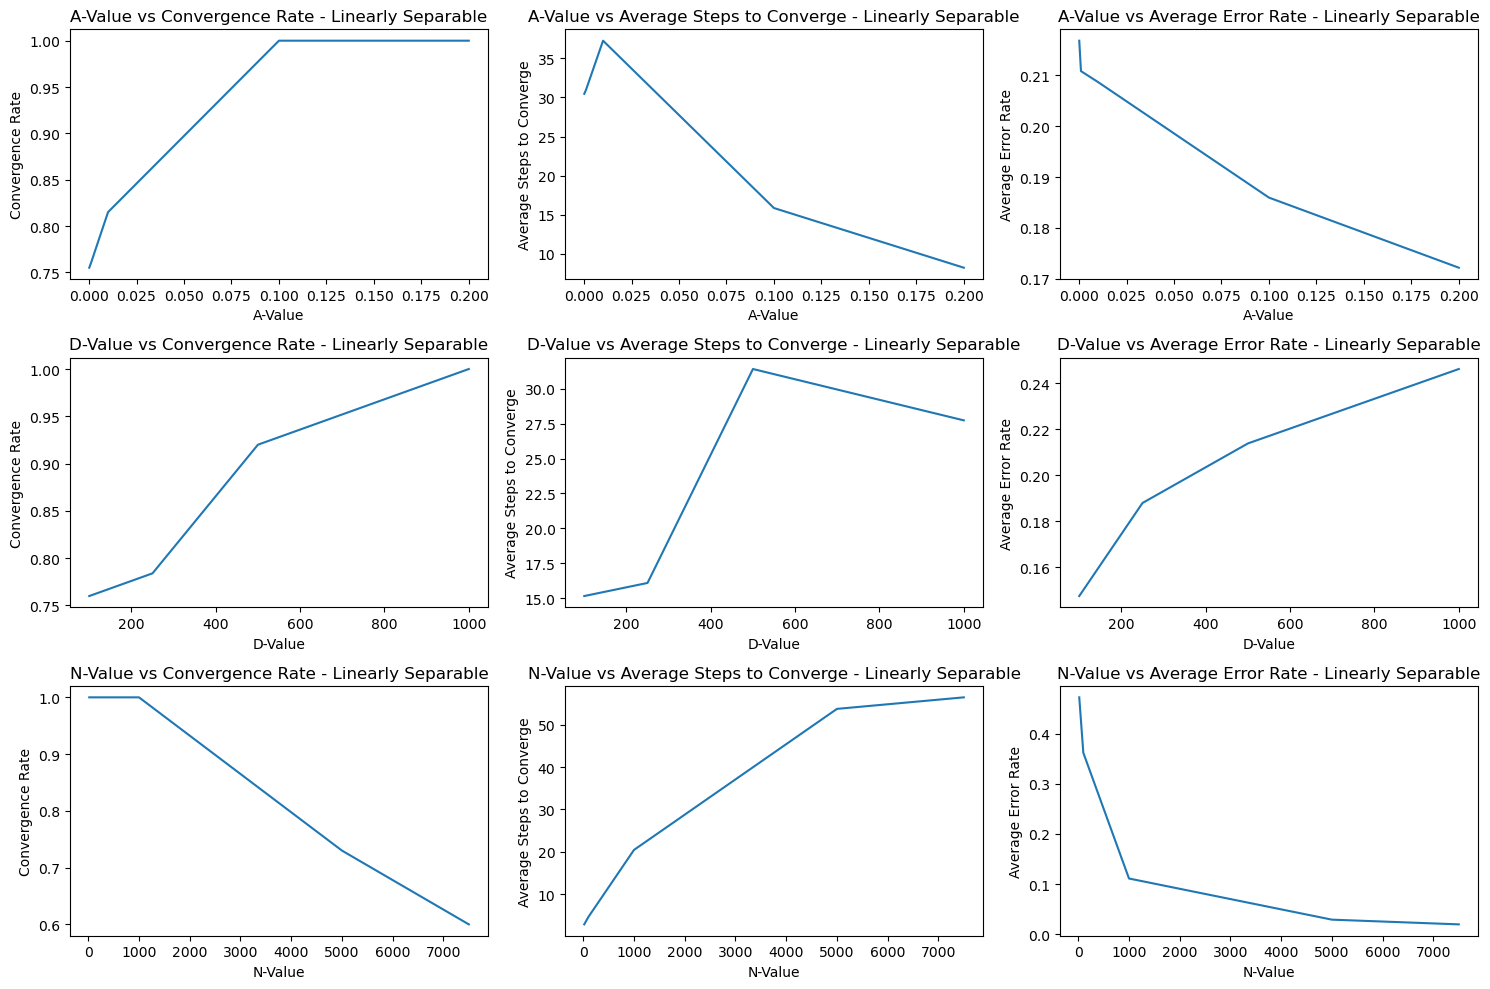

In [54]:
#Plot the Linearly Separable Results

df_log_ls = pd.read_excel(path_out_+'//'+'df_log_linearly_separable.xlsx')
df_log_ls = df_log_ls[df_log_ls['d_value']>2]

# Lists for iteration
list_groupbys = ['a_value', 'd_value', 'n_value']
list_groupbys_name = ['A-Value', 'D-Value', 'N-Value']
y_values = ['convergence_rate', 'average_steps_taken', 'average_error_rate']
list_calcs = ['Convergence Rate', 'Average Steps to Converge', 'Average Error Rate']
type_ = 'Linearly Separable'

# Create a subplot layout
fig, axes = plt.subplots(len(list_groupbys), len(list_calcs), figsize=(15, 10))

for i, col in enumerate(list_groupbys):
    df_ = df_log_ls.copy()
    df_['convergence_rate'] = df_.groupby(by=[col])['convergence_ind'].transform('mean')
    df_['average_error_rate'] = df_.groupby(by=[col])['error_rate'].transform('mean')
    df_ = df_[df_['convergence_ind'] == 1]
    df_['average_steps_taken'] = df_.groupby(by=[col])['steps_to_converge'].transform('mean')
    df_unique = df_.drop_duplicates(subset=[col])

    for j, calc in enumerate(list_calcs):
        y_val = y_values[j]
        axes[i, j].plot(df_unique[col].to_numpy(), df_unique[y_val].to_numpy())
        axes[i, j].set_xlabel(list_groupbys_name[i])
        axes[i, j].set_ylabel(calc)
        axes[i, j].set_title(f'{list_groupbys_name[i]} vs {calc} - {type_}')

plt.tight_layout()
plt.show()


Here we see the behavior of the algorithm with respect to various parameters.

The a parameter represents the extent to which the data is separable. An a value closer to zero increases the difficulty of separating the data given how we're defined the X iid population. For the a values closer to zero we see there are simulations that could not converge within 200 epochs (80% converged), we see that when the algorithm does converge it takes more steps to reach convergence (around 30), and we see that the error rate is higher. As the a values move further away from zero, we see the algorithm converge for each simulation, the number of steps it takes for the algorithm to converge is less (around 10) and the error rate decreases. This is in line with what we would expect to see with the a parameter determining the extent to which the data is linearly separable. 

The d parameter represents the dimension of the sample data. We see as dimension increases, the probability of the algorithm converging increases, the average steps to converge peaks around dimension 500 and then decreases again, and we see the error rate increase. We'd expect the error rate to increase in line with the curse of dimensionality where the increase in dimension does not lead to a lower error rate. It is surprising the see the convergence rate increase as dimension increases.

The n parameter represents the size of the sample data the model is trained on. We see that up to the point where n is 1000 we see the model always converge (in less than 200 steps) but after that when n is 7500 it only converges around 75% of the time. For the cases where the algorithm does converge, we see it takes more steps for the algorithm to converge as the size of the sample data increases. We see the error rate of test data decrease exponentially as the size of the sample data increases. This is in line with what we would expect in terms of average steps taken and average error rate relating to the sample size.

In [69]:
#create log of non-linearly separable data
# df_log_nls = pd.DataFrame()

In [76]:
# #Non-linearly separable case

# m_values = [0, 2, 4]
# d_values = [2, 100, 250, 500, 1000]
# n_values = [20, 100, 1000, 5000, 7500]

# learning_rate = .1
# max_epochs = 100

# num_of_simulations = 20

# #create a log of testing different values
# for iter_ in range(num_of_simulations):
#     print(iter_)
#     for m in m_values:
#         for d in d_values:
#             for n in n_values:
#                 x, y = generate_nls_data(m, d, n)
#                 w, b, update_log, steps_to_converge, convergence_ind = perceptron_algorithm(x, y, learning_rate, max_epochs)
#                 x_test, y_test = generate_nls_data(m, d, n)
#                 error_count, error_rate = perceptron_algorithm_accuracy(x_test, y_test, w, b)
#                 df_ = pd.DataFrame([[iter_, m, d, n, steps_to_converge, convergence_ind, error_rate]], columns = ['simulation_run','m_value','d_value','n_value','steps_to_converge','convergence_ind','error_rate'])
#                 df_log_nls = pd.concat([df_log_nls,df_], ignore_index = False)
#                 df_log_nls.reset_index(drop = True, inplace = True)
#                 df_log_nls.to_excel(path_out_+'//'+'df_log_nonlinearly_separable.xlsx',index = False)


convergence indicator 0
steps to converge 100
error rate 0.53


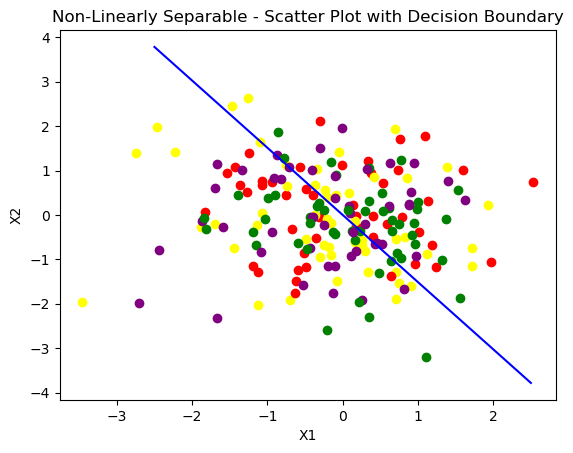

In [106]:
m = 0 #or another value greater than 0
d = 2
n = 100

x, y = generate_nls_data(m, d, n)
# print("x",x)
# print("y",y)

learning_rate = .1
max_epochs = 100

w, b, update_log, steps_to_converge, convergence_ind = perceptron_algorithm(x, y, learning_rate, max_epochs)

print("convergence indicator",convergence_ind)
print("steps to converge",steps_to_converge)

# print("w",w)
# print("b",b)

x_test, y_test = generate_nls_data(m, d, n)

error_count, error_rate = perceptron_algorithm_accuracy(x_test, y_test, w, b)

print("error rate", error_rate)

# Scatter plot
for xi, yi in zip(x, y):
    if yi == 1:
        plt.scatter(xi[0], xi[1], color='yellow')
    else:
        plt.scatter(xi[0], xi[1], color='red')
#test data
for xi, yi in zip(x_test, y_test):
    if yi == 1:
        plt.scatter(xi[0], xi[1], color='green')
    else:
        plt.scatter(xi[0], xi[1], color='purple')

# To plot the line, we need two points that satisfy the equation. Let's choose two x values:
# x_values_train = np.array([min(x, key=lambda v: v[0])[0], max(x, key=lambda v: v[0])[0]])
# x_values_test = np.array([min(x_test, key=lambda v: v[0])[0], max(x_test, key=lambda v: v[0])[0]])
# x_values = np.array([min(x_values_train[0],x_values_test[0]), max(x_values_train[1],x_values_test[1])])
x_values = np.array([-2.5,2.5])
# Calculate corresponding y values
y_values = (-b - w[0]*x_values) / w[1]

plt.plot(x_values, y_values, color='blue')  # Plotting the line
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Non-Linearly Separable - Scatter Plot with Decision Boundary')
plt.show()

Again we have a 2D example of 100 samples where the yellow dots represent the sample data points with Y=1, the red dots represent the sample data points with Y=-1, the green dots represent the test data points with Y=1 and the purple dots represent the test data points with Y=-1.

We see that the data is not linearly separable (the red and yellow dots overlap and the green and purple dots overlap), the algorithm is not able to converge to a model that linearly separates the data and the model created performs as well as a guess (error rate = .5).

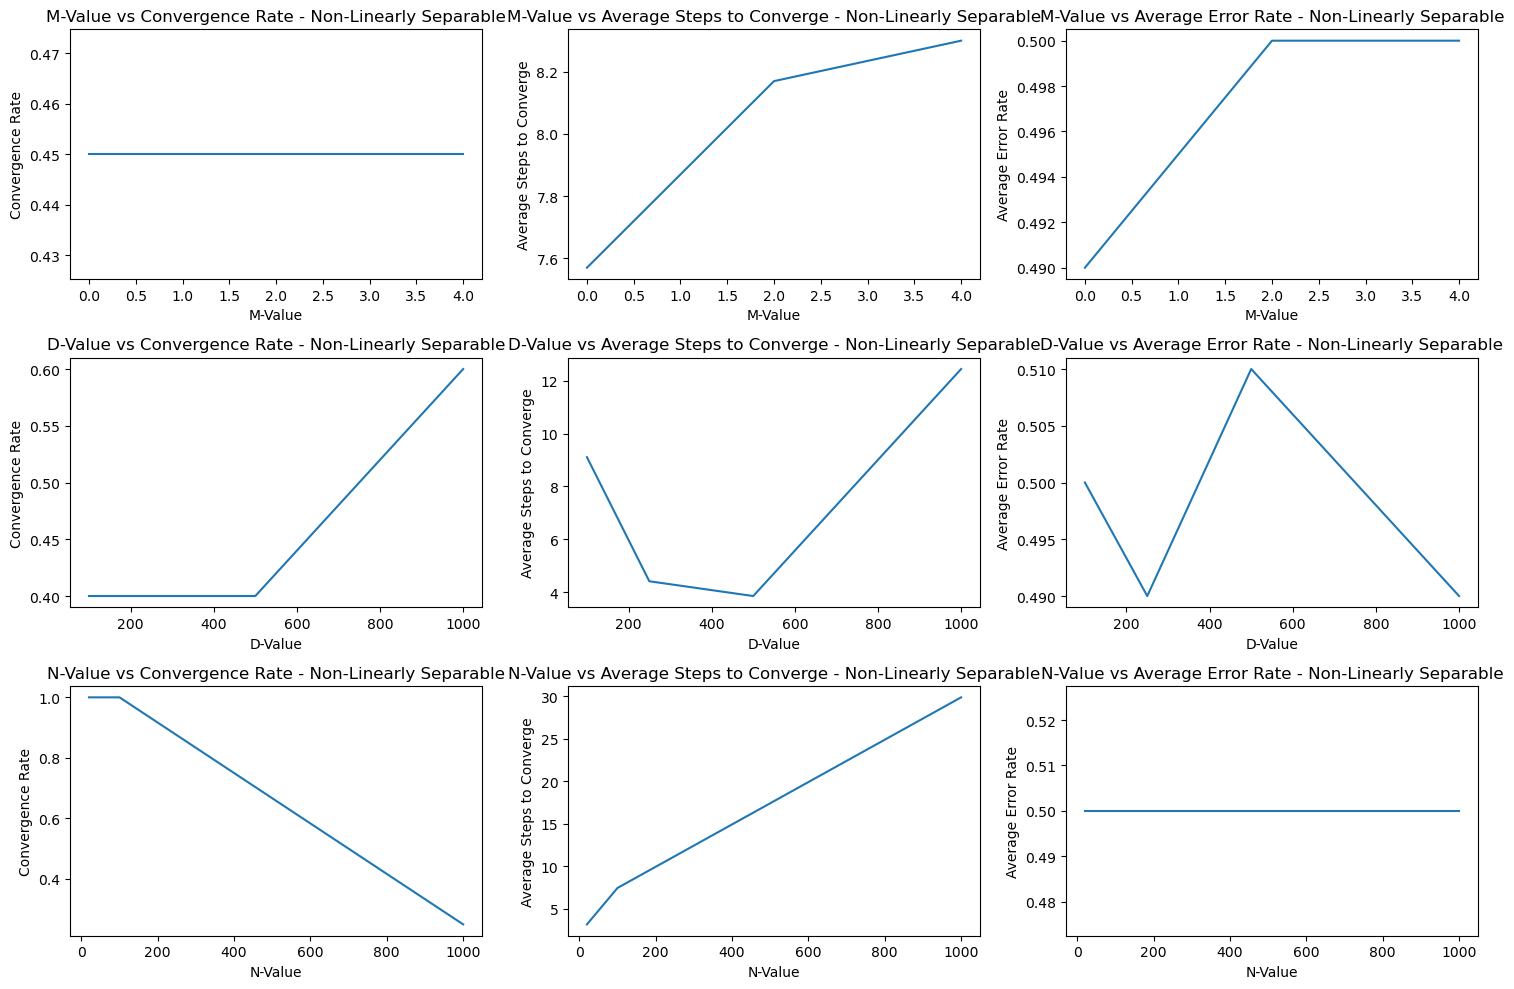

In [75]:
#Plot the Non-Linearly Separable Results

df_log_nls = pd.read_excel(path_out_+'//'+'df_log_nonlinearly_separable.xlsx')
df_log_nls = df_log_nls[df_log_nls['d_value']>2]

# Lists for iteration
list_groupbys = ['m_value', 'd_value', 'n_value']
list_groupbys_name = ['M-Value', 'D-Value', 'N-Value']
y_values = ['convergence_rate', 'average_steps_taken', 'average_error_rate']
list_calcs = ['Convergence Rate', 'Average Steps to Converge', 'Average Error Rate']
type_ = 'Non-Linearly Separable'

# Create a subplot layout
fig, axes = plt.subplots(len(list_groupbys), len(list_calcs), figsize=(15, 10))

for i, col in enumerate(list_groupbys):
    df_ = df_log_nls.copy()
    df_['convergence_rate'] = df_.groupby(by=[col])['convergence_ind'].transform('mean').round(2)
    df_ = df_[df_['convergence_ind'] == 1]
    df_['average_error_rate'] = df_.groupby(by=[col])['error_rate'].transform('mean').round(2)
    df_['average_steps_taken'] = df_.groupby(by=[col])['steps_to_converge'].transform('mean').round(2)
    df_unique = df_.drop_duplicates(subset=[col])

    for j, calc in enumerate(list_calcs):
        y_val = y_values[j]
        axes[i, j].plot(df_unique[col].to_numpy(), df_unique[y_val].to_numpy())
        axes[i, j].set_xlabel(list_groupbys_name[i])
        axes[i, j].set_ylabel(calc)
        axes[i, j].set_title(f'{list_groupbys_name[i]} vs {calc} - {type_}')

plt.tight_layout()
plt.show()

Although this data is not linearly separable, we see that for some reason the algorithm converges to a model it deems able to linearly separate the data. Yet when the trained models are used on test data, we see the average error rate for all three graphs, regardless of metric, is approximately .5 meaning our trained models perform as well as a coin flip guess. So although our models may 'converge', they do not perform better than a random classification guess.

With regards to the m parameter representing the mean of the first element of the multivariate normal sample data, we have that the occurance rate an algorithm converges to a model, the average steps to converges (when the algorithm does converge) and the error rate are all approximately the same regardless of m value.

The d parameter representing dimension, we see that the convergence rate is between .4 and .6 and increases as dimension increases. When the algorithm does converge to a model. We have that the average error rate is consistently approximately 50% when the model is used to classify test data. The average steps taken when the algorithm does converge is around 8 steps plus or minus 4 steps with isn't much of a range to relate dimension and average steps to converge to a model.

The sample size represented by the n parameter has an average error rate remains that is consistently around 50%. We see the convergence rate has a negative linear relationship to sample size. We see that the average number of steps to reach convergence increases as sample size increases which is typical of what we'd expect. 